In [43]:
import joblib
import pandas as pd
df = pd.read_csv('../data/processed_bank_transaction_data.csv')

In [44]:
df.columns

Index(['AccountID', 'TransactionAmount', 'TransactionType', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'amount_to_balance_ratio', 'avg_txn_amount_account',
       'txn_amount_account', 'mean', 'std', 'amount_zscore',
       'diff_btwn_txn_times', 'avg_time_btwn_txns', 'amount_to_user_avg',
       'unique_merchant_user', 'TransactionHour', 'TransactionDayOfTheWeek',
       'is_night', 'unique_devices_per_account', 'unique_ips_per_account',
       'unique_accounts_per_devices', 'merchant_avg_amount',
       'merchant_amount_deviation', 'avg_loginAttempts', 'loginAttemps_excess',
       'TransactionAmount_log'],
      dtype='object')

In [23]:
preprocessor = joblib.load('../artifacts/preprocessor.joblib')

In [24]:
x_new = df.drop(columns=['TransactionID','TransactionDate','PreviousTransactionDate']).copy()

In [31]:
# ============================================
# STAGE 1: UNSUPERVISED ANOMALY DETECTION (ISOLATION FOREST)
# ============================================

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from category_encoders import HashingEncoder
# -------------------------
# 1. Load your processed dataset
# -------------------------
# assuming your cleaned dataset is named df_processed
# and contains only numerical + encoded columns
# (no IDs or date/time strings)

df = df.copy()

# Define features
X = df.drop(columns=['TransactionID', 'TransactionDate','PreviousTransactionDate'], errors='ignore')
hash_features = ['AccountID','DeviceID','IP Address']
hash_encode = HashingEncoder(cols=hash_features, n_components=16)
x_hashed = hash_encode.fit_transform(X)

x = preprocessor.fit_transform(x_hashed)

In [32]:
x

array([[-0.97127547,  1.42371826, -0.55244326, ...,  1.        ,
        59.        , 32.        ],
       [ 0.26943961,  1.31128706,  0.30531437, ...,  1.        ,
        63.        , 27.        ],
       [-0.58688162, -1.44327736, -0.90984227, ...,  1.        ,
        61.        , 30.        ],
       ...,
       [-0.92146186,  0.63669986,  0.37679417, ...,  1.        ,
        59.        , 25.        ],
       [-0.38241973, -1.21841495, -1.43879281, ...,  1.        ,
        62.        , 20.        ],
       [-0.18676257, -1.16219935, -0.38089174, ...,  0.        ,
        60.        , 20.        ]], shape=(2512, 39))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.2s remaining:    3.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


Anomalies detected: 76 out of 2512


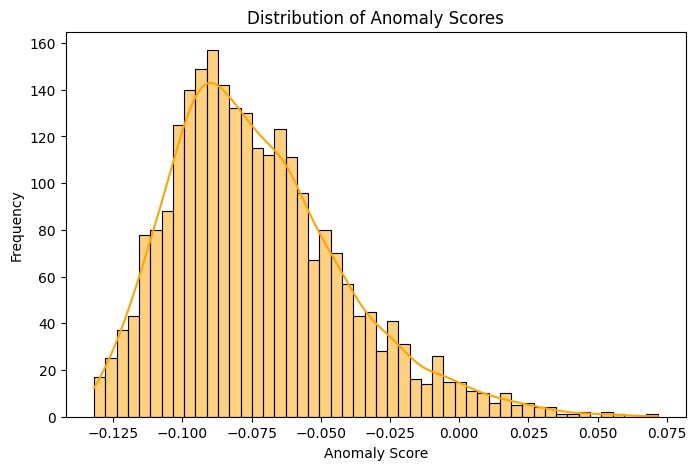

,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,unique_devices_per_account,unique_ips_per_account,unique_accounts_per_devices,merchant_avg_amount,merchant_amount_deviation,avg_loginAttempts,loginAttemps_excess,TransactionAmount_log,AnomalyFlag,AnomalyScore
6,6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,...,1,1,4,210.081333,-203.001333,1.000000,0.000000,2.089392,1,0.013508
85,85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,...,5,5,7,409.340952,930.849048,1.000000,0.000000,7.201313,1,0.014703
101,101,TX000102,AC00018,98.54,2023-08-11 16:18:46,Credit,El Paso,D000528,34.125.226.63,M095,...,3,3,3,205.840000,-107.300000,2.333333,-1.333333,4.600560,1,0.017546
147,147,TX000148,AC00161,514.95,2023-04-13 18:37:48,Debit,New York,D000109,23.92.205.75,M056,...,4,4,3,283.394091,231.555909,2.000000,3.000000,6.246010,1,0.016954
176,176,TX000177,AC00363,1362.55,2023-02-10 18:07:07,Debit,El Paso,D000213,93.52.44.101,M001,...,12,12,3,260.002500,1102.547500,1.000000,0.000000,7.217847,1,0.053738
195,195,TX000196,AC00363,3.30,2023-03-27 16:42:16,Credit,Los Angeles,D000215,116.44.12.250,M085,...,12,12,6,326.409600,-323.109600,1.000000,0.000000,1.458615,1,0.001197
274,274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,...,4,4,4,330.619259,845.660741,2.000000,3.000000,7.070962,1,0.071646
340,340,TX000341,AC00107,1830.00,2023-03-01 16:31:58,Debit,San Antonio,D000436,62.27.235.199,M082,...,5,4,4,365.976111,1464.023889,1.000000,0.000000,7.512618,1,0.025515
375,375,TX000376,AC00316,1392.54,2023-11-20 16:51:14,Debit,El Paso,D000113,63.67.150.226,M013,...,6,6,5,315.646970,1076.893030,1.500000,-0.500000,7.239603,1,0.025907
394,394,TX000395,AC00326,6.30,2023-12-14 18:52:54,Debit,Columbus,D000539,210.160.90.52,M017,...,5,5,4,272.020870,-265.720870,1.800000,3.200000,1.987874,1,0.025118


✅ Isolation Forest model saved successfully.


In [33]:

# -------------------------
# 2. Initialize Isolation Forest
# -------------------------
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.03,        # expected fraction of anomalies (tune this)
    max_samples='auto',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# -------------------------
# 3. Train the model
# -------------------------
iso_forest.fit(x)

# -------------------------
# 4. Get predictions and anomaly scores
# -------------------------
# predictions: -1 = anomaly, 1 = normal
preds = iso_forest.predict(x)
scores = iso_forest.decision_function(x)  # higher score = more normal

# Convert to readable form
df['AnomalyFlag'] = np.where(preds == -1, 1, 0)  # 1 = anomaly/fraud
df['AnomalyScore'] = -scores  # invert so higher means more anomalous

# -------------------------
# 5. Analyze results
# -------------------------
print("Anomalies detected:", df['AnomalyFlag'].sum(), "out of", len(df))

# Distribution of scores
plt.figure(figsize=(8,5))
sns.histplot(df['AnomalyScore'], bins=50, kde=True, color='orange')
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# Quick overview of anomaly transactions
display(df[df['AnomalyFlag'] == 1].head(10))

# -------------------------
# 6. Save model artifact
# -------------------------
joblib.dump(iso_forest, "../artifacts/isolation_forest_model.joblib")
print("✅ Isolation Forest model saved successfully.")

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [45]:
df.columns

Index(['AccountID', 'TransactionAmount', 'TransactionType', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'amount_to_balance_ratio', 'avg_txn_amount_account',
       'txn_amount_account', 'mean', 'std', 'amount_zscore',
       'diff_btwn_txn_times', 'avg_time_btwn_txns', 'amount_to_user_avg',
       'unique_merchant_user', 'TransactionHour', 'TransactionDayOfTheWeek',
       'is_night', 'unique_devices_per_account', 'unique_ips_per_account',
       'unique_accounts_per_devices', 'merchant_avg_amount',
       'merchant_amount_deviation', 'avg_loginAttempts', 'loginAttemps_excess',
       'TransactionAmount_log'],
      dtype='object')